In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
df = pd.read_csv('/content/drive/My Drive/Oyesters-ML/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df = df.loc[:,['ENGINESIZE', 'CO2EMISSIONS']]
df

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [36]:
df.head(20)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
5,3.5,230
6,3.5,232
7,3.7,255
8,3.7,267
9,2.4,212


In [7]:
real_x = df.iloc[:,0].values
real_y = df.iloc[:,1].values
real_x = real_x.reshape(-1,1)
real_y = real_y.reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
training_x, testing_x, training_y, testing_y = train_test_split(real_x, real_y, test_size = 0.2, random_state = 0)

In [21]:
Lin = LinearRegression()
Lin.fit(training_x,training_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
Pred_y = Lin.predict(testing_x)

In [39]:
testing_x[0]

array([5.5])

In [40]:
testing_y[0]

array([356])

In [41]:
Pred_y[0]

array([342.05531526])

In [42]:
Lin.predict([[5.5]])

array([[342.05531526]])

In [59]:
Lin.predict([[2.4]])

array([[220.3853239]])

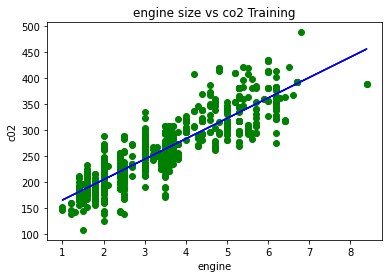

In [43]:
plt.scatter(training_x, training_y, color = 'green')
plt.plot(training_x, Lin.predict(training_x), color = 'blue')
plt.title("engine size vs co2 Training")
plt.xlabel("engine")
plt.ylabel("c02")
plt.show()

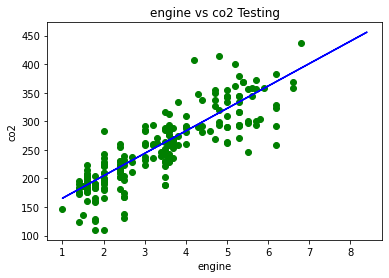

In [44]:
plt.scatter(testing_x, testing_y, color = 'green')
plt.plot(training_x, Lin.predict(training_x), color = 'blue')
plt.title("engine vs co2 Testing")
plt.xlabel("engine")
plt.ylabel("co2")
plt.show()

In [55]:
np.abs(testing_y - Pred_y).mean()

25.56889045602356

In [56]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(testing_y,Pred_y)

25.56889045602356

In [45]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [46]:
joblib.dump(Lin, 'model_joblib')

['model_joblib']

In [47]:
new = joblib.load('/content/model_joblib')

In [48]:
new.coef_

array([[39.24838431]])

In [49]:
new.intercept_

array([126.18920155])

In [50]:
Pred_y = new.predict(testing_x)

In [51]:
Pred_y[2]

array([220.3853239])